In [38]:
import pandas as pd
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as signal
import xarray as xr
import glob
import om4labs.om4common as om4
from scipy.stats import t

# parameters for setting circular cutoff for Southern Ocean plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [20]:
file_prefix = '/archive/Katherine.Turner/xanadu_mom6_20220703/CM4_piControl_C_restartyear148/gfdl.ncrc5-intel22-prod-openmp/pp/atmos_cmip_2deg_daily_3D_Plev8/ts/daily/5yr/'
files = [file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.01610101-01651231.ta.nc',
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.01660101-01701231.ta.nc',
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.01710101-01751231.ta.nc',
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.01760101-01801231.ta.nc',
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.01810101-01851231.ta.nc',
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.01860101-01901231.ta.nc',
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.01910101-01951231.ta.nc',
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.01960101-02001231.ta.nc',
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.02010101-02051231.ta.nc', 
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.02060101-02101231.ta.nc',
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.02110101-02151231.ta.nc',
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.02160101-02201231.ta.nc',
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.02210101-02251231.ta.nc',
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.02260101-02301231.ta.nc',
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.02310101-02351231.ta.nc',
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.02360101-02401231.ta.nc',
         file_prefix+'atmos_cmip_2deg_daily_3D_Plev8.02410101-02451231.ta.nc']

In [29]:
file_prefix = '/archive/Katherine.Turner/fre/FMS2021.02_mom6_ESM4_v1.0.3/ESM4_piControl_D/gfdl.ncrc5-intel23-prod-openmp/pp/atmos_level/ts/monthly/5yr'

In [30]:
ds = xr.open_mfdataset(f"{file_prefix}/*.temp.nc", use_cftime=True)

In [33]:
ds_lev = ds.sel(pfull=50, method='nearest')

In [34]:
var='temp'

## Winter stormy and non-stormy years

In [35]:
high_years = {'CM4':[159, 182, 194, 198, 219, 229, 237],
              'ESM4':[22, 31, 60, 65, 67, 68, 72]}
low_years = {'CM4':[175, 187, 205, 220, 221, 232, 238],
             'ESM4':[3, 7, 58, 59, 70, 94, 97]}

mod = 'ESM4'

In [36]:
idx_jja = (ds.time.dt.season == 'JJA')

idx_hi = ds.time.dt.year.isin(high_years[mod]) & (ds.time.dt.season == 'JJA')
idx_lo = ds.time.dt.year.isin(low_years[mod]) & (ds.time.dt.season == 'JJA')

ds_monthly = ds.resample(time='QS-DEC').mean()

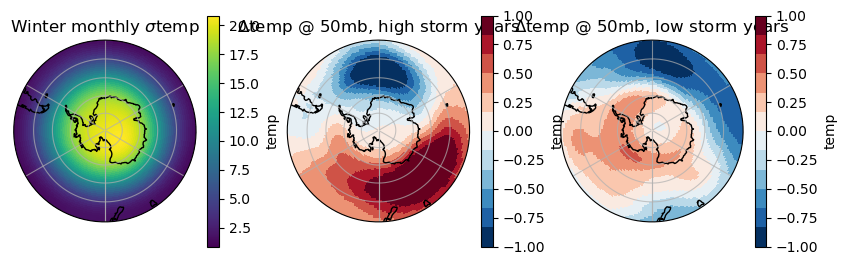

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=3,
                       subplot_kw={'projection': ccrs.SouthPolarStereo()}, 
                       figsize=(10,3))
axs=axs.flatten()

(ds_lev[var][2::4,:,:]).std(dim='time').plot(ax=axs[0], transform=ccrs.PlateCarree(), 
                                                        #vmin=0, vmax=1, extend='neither'
                                                       )


((ds_lev[var][idx_hi,:,:].mean(dim='time') - ds_lev[var][idx_jja,:,:].mean(dim='time'))).plot(ax=axs[1], transform=ccrs.PlateCarree(), 
                                                               vmax=1, vmin=-1, extend='neither',
                                                               cmap=plt.get_cmap('RdBu_r', 12))

((ds_lev[var][idx_lo,:,:].mean(dim='time') - ds_lev[var][idx_jja,:,:].mean(dim='time'))).plot(ax=axs[2], transform=ccrs.PlateCarree(), 
                                                               vmax=1, vmin=-1, extend='neither',
                                                               cmap=plt.get_cmap('RdBu_r', 12))

axs[0].set_title(f'Winter monthly $\sigma${var}')
axs[1].set_title(f'$\Delta${var} @ 50mb, high storm years')
axs[2].set_title(f'$\Delta${var} @ 50mb, low storm years')

for i in range(3):
    axs[i].set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
plt.savefig('/home/Katherine.Turner/Figures/ESM4_winters_temp50mb.png', format='png', dpi=100)

## Summer stormy and non-stormy years

In [114]:
high_years = {'CM4':[163, 180, 184, 196, 203, 219, 229],
              'ESM4':[14, 53, 59, 72, 76, 81, 90]}
low_years = {'CM4':[190, 210, 213, 226, 232, 236, 237],
             'ESM4':[39, 50, 51, 70, 93, 97, 100]}

In [115]:
idx_jja = (ds.time.dt.season == 'DJF')

idx_hi = ds.time.dt.year.isin(high_years[mod]) & (ds.time.dt.season == 'DJF')
idx_lo = ds.time.dt.year.isin(low_years[mod]) & (ds.time.dt.season == 'DJF')

ds_monthly = ds.resample(time='QS-DEC').mean()

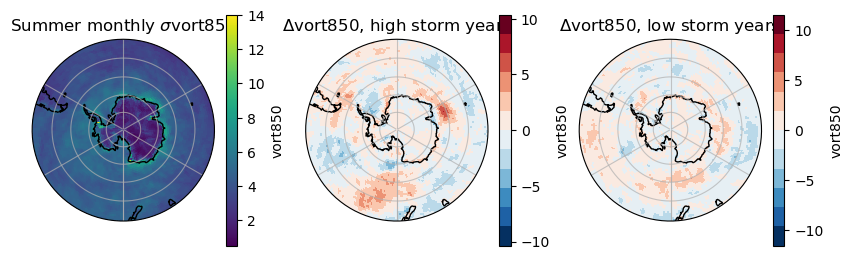

In [117]:
fig, axs = plt.subplots(nrows=1, ncols=3,
                       subplot_kw={'projection': ccrs.SouthPolarStereo()}, 
                       figsize=(10,3))
axs=axs.flatten()

(c[var]*ds_monthly[var][2::4,:,:]).std(dim='time').plot(ax=axs[0], transform=ccrs.PlateCarree(), 
                                                       # vmin=0, vmax=1, extend='neither'
                                                       )


(c[var]*(ds[var][idx_hi,:,:].mean(dim='time') - ds[var][idx_jja,:,:].mean(dim='time'))).plot(ax=axs[1], transform=ccrs.PlateCarree(), 
                                                               #vmax=.75, vmin=-.75, extend='neither',
                                                               cmap=plt.get_cmap('RdBu_r', 12))

(c[var]*(ds[var][idx_lo,:,:].mean(dim='time') - ds[var][idx_jja,:,:].mean(dim='time'))).plot(ax=axs[2], transform=ccrs.PlateCarree(), 
                                                               #vmax=.75, vmin=-.75, extend='neither',
                                                               cmap=plt.get_cmap('RdBu_r', 12))

axs[0].set_title(f'Summer monthly $\sigma${var}')
axs[1].set_title(f'$\Delta${var}, high storm years')
axs[2].set_title(f'$\Delta${var}, low storm years')

for i in range(3):
    axs[i].set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()

In [52]:
summer_storm_counts = xr.DataArray([4248, 4181, 4098, 4150, 4446, 4364, 4399, 4104, 4509, 4224, 4063,
                       4303, 4587, 4110, 4209, 4272, 4219, 4422, 4455, 4272, 4055, 4228,
                       4466, 4410, 4404, 4327, 4211, 4226, 4169, 4580, 4286, 4349, 4477,
                       4691, 4554, 4456, 4440, 4225, 4292, 3974, 4532, 4164, 4448, 4285,
                       4313, 4567, 4388, 4355, 4234, 4452, 4083, 4284, 4723, 4193, 4536,
                       4245, 4231, 4456, 4259, 4050, 4405, 4114, 3952, 4402, 4116, 4382,
                       4176, 4323, 4776, 4318, 4463, 4084, 4382, 4134, 4179, 4039, 4391,
                       4466, 4614, 4442, 4262, 4012, 4171, 4412, 4460, 4047, 3884, 4256,
                       4550, 4291, 4503, 4218, 4511, 4448, 4332],
                                   dims=("time"),
                                   coords=[
                                       ("time", ds_monthly.time[:-1:4].data)
                                   ]
                                  )

winter_storm_counts = xr.DataArray([4556, 4664, 4831, 4930, 4624, 4806, 4848, 5014, 5199, 4835, 4804,
       4862, 5115, 4859, 4866, 4722, 4584, 4740, 4731, 4886, 4800, 4631,
       4536, 4910, 4472, 4677, 4890, 4771, 4781, 4908, 4836, 5142, 4648,
       4842, 4773, 4928, 4527, 4806, 4921, 4899, 5044, 5012, 4821, 5143,
       4737, 4672, 4627, 5421, 4798, 4719, 4830, 4979, 4912, 4899, 4490,
       4787, 4645, 4840, 4781, 4939, 4993, 4900, 4630, 4587, 4701, 4923,
       4786, 4574, 5122, 4502, 4452, 4816, 4811, 4983, 4946, 4801, 4923,
       4548, 5187, 4631, 4905, 4479, 4850, 4694, 4904, 4751, 5163, 4482,
       4948, 4983, 4896, 5089, 5025, 4570, 4408],
                                   dims=("time"),
                                   coords=[
                                       ("time", ds_monthly.time[2:-1:4].data)
                                   ]
                                  )

In [53]:
test = xr.corr(winter_storm_counts, ds_monthly.slp[2:-1:4,:,:], dim="time")

In [55]:
n = 95
r = test

# Compute t-statistic
t_stat = r * np.sqrt((n - 2) / (1 - r**2))

# Compute two-tailed p-value
pval = xr.apply_ufunc(
    lambda x: 2 * t.sf(np.abs(x), df=n - 2),
    t_stat,
    input_core_dims=[[]],
    output_core_dims=[[]],
    vectorize=True,
    dask="allowed"
)

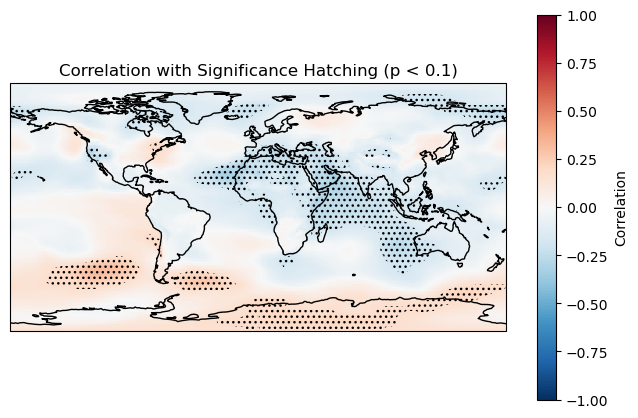

In [56]:
proj = ccrs.PlateCarree()  # or another if you're using rotated pole etc.

fig, ax = plt.subplots(figsize=(8, 5), subplot_kw={'projection': proj})

# Plot the correlation field
pc = ax.pcolormesh(
    r.lon, r.lat, r,
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r', vmin=-1, vmax=1
)
fig.colorbar(pc, ax=ax, label='Correlation')

# Add hatching for non-significant areas
sig_mask = pval < 0.10

hatch = ax.contourf(
    r.lon, r.lat, sig_mask,
    levels=[0.5, 1],
    hatches=['...', None],
    colors='none',
    transform=ccrs.PlateCarree()
)

# Add coastlines and optional features
ax.coastlines()

ax.set_title("Correlation with Significance Hatching (p < 0.1)")

plt.show()

## Soft weighting approach (try to emphasize extreme storm years)

In [96]:
summer_anomaly = summer_storm_counts - summer_storm_counts.mean()

summer_weights = summer_anomaly**2 #np.abs(summer_anomaly)
summer_weights = summer_weights / summer_weights.sum()

In [97]:
a = summer_storm_counts 
b = ds_monthly.tos[:-1:4,:,:]

# Compute weighted means
mean_a = (a * summer_weights).sum(dim='time')
mean_b = (b * summer_weights).sum(dim='time')

In [98]:
# Compute weighted covariance and variances
cov_ab = ((a - mean_a) * (b - mean_b) * summer_weights).sum(dim='time')
var_a = ((a - mean_a)**2 * summer_weights).sum(dim='time')
var_b = ((b - mean_b)**2 * summer_weights).sum(dim='time')

r_sqweighted = cov_ab / np.sqrt(var_a * var_b)

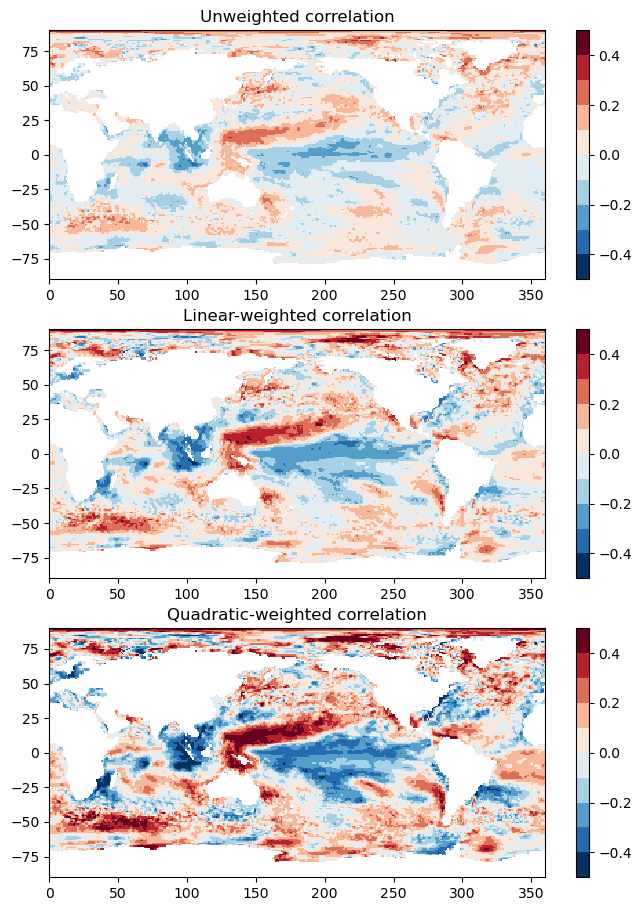

In [103]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8,11))

r_unweighted.plot(ax=axs[0], vmin=-.5, vmax=.5, extend='neither', cmap=plt.get_cmap("RdBu_r",10))
axs[0].set_title('Unweighted correlation')
r_weighted.plot(ax=axs[1], vmin=-.5, vmax=.5, extend='neither', cmap=plt.get_cmap("RdBu_r",10))
axs[1].set_title('Linear-weighted correlation')
r_sqweighted.plot(ax=axs[2], vmin=-.5, vmax=.5, extend='neither', cmap=plt.get_cmap("RdBu_r",10))
axs[2].set_title('Quadratic-weighted correlation')

for i in range(3):
    axs[i].set_ylabel('')
    axs[i].set_xlabel('')
    
plt.savefig('/home/Katherine.Turner/Figures/summer_storms_SST_corr_options.png', format='png', dpi=100)

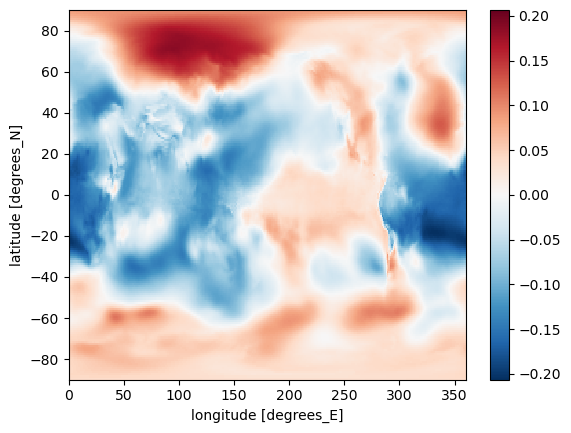

In [81]:
(r_weighted - r_unweighted).plot()